According to Wikipedia, the iris flower data set is a collected data to quantify the morphologic variation of iris flowers of three related species. It consists 50 samples from each of the species and sampled four features. Using EDA, we will explore some important features in the data and compare the relationship between variables.

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('Iris.csv')

In [3]:
#view the data
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


To view the missing values in the dataframe, we use the `df1.isnull()` function. We can also visualize the null values in the dataset with the function below:

<AxesSubplot:>

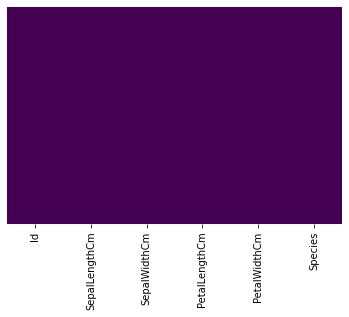

In [4]:
sns.heatmap(df1.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

This proves that there are no missing values in the dataset

In [5]:
#check the descriptive statistics
df1.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
#check the shape
df1.shape

(150, 6)

The shape shows that the dataframe is made up of 150 rows and 6 columns

In [7]:
#check the dataset information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#check the type of data set
df1.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
#check for duplicates
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

### Outliers
Here we will check for the outliers in all the columns in the dataset using a boxplot

C:\Users\Vanessa Onyema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm'>

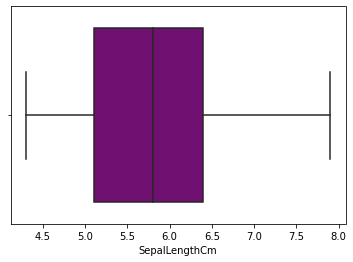

In [10]:
#sepal length
sns.boxplot(df1['SepalLengthCm'], color='purple')

C:\Users\Vanessa Onyema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

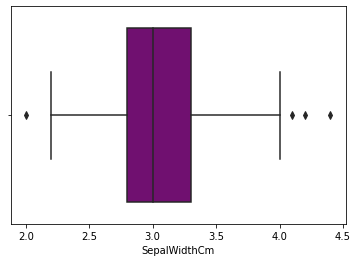

In [11]:
#sepal width
sns.boxplot(df1['SepalWidthCm'], color='purple')

C:\Users\Vanessa Onyema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalWidthCm'>

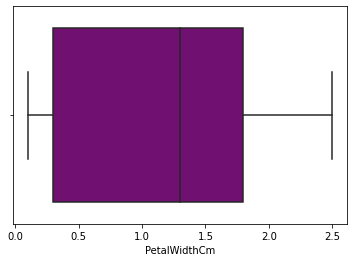

In [12]:
#petal width
sns.boxplot(df1['PetalWidthCm'], color='purple')

C:\Users\Vanessa Onyema\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm'>

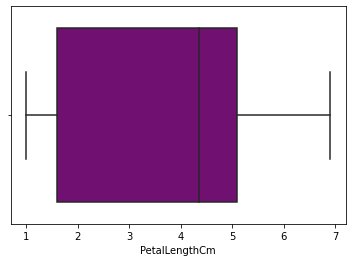

In [13]:
#petal length
sns.boxplot(df1['PetalLengthCm'], color='purple')

For all the column variables, there are no extreme range of values that need to be removed or set to the range. Outliers can create problems at the final visualization stage of the data and it is always best to set the values to correspond with other values in the data or filter them out of the data.

### Correlation
This can be used to check the relationship between variables. This can be represented using a heatmap.

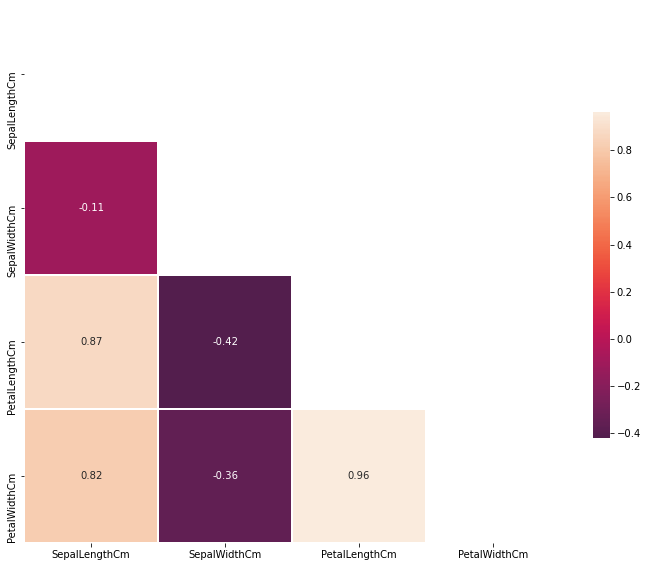

In [14]:
# Calculate the correlation matrix
corr = df1.iloc[:, 1:5].corr(method="pearson")

# Generate a mask for the upper triangle
mask = np.triu(corr)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12,12))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, linewidths=1, annot=True, square=True, mask=mask, fmt=".2f", center=0.08,cbar_kws={"shrink":0.5}, cmap='rocket')
plt.savefig("corrplotiris.svg")

We will compare the positive correlation and negative correlation for the variables. Correlations below +0.30 and -0.30 are weak and have no strong relationship between the variable. Here the ID in the data represents the sample size so it won¨t be counted as a variable.

**Positive correlation**

In positive correlations, the closer the relationship is to +1, the higher the correlation. Positive correlation shows that as one variable increases the other increases. We will check the positive correlation for the following:

* Sepal length: Petal length, Petal width
* Petal length: Petal width

**Negative correlation**

In negative correlations, the closer the relationship is to -1, the higher the correlation. Negative correlation shows that as one variable increases the other decreases. We will check the negative correlation for the following:

* Sepal width: Petal length, Petal width

### Pairplot

A pairplot can also be used to view pairwise the relationship between variables. It creates a grid of axes that shows each variable in the data. The pairplot shows the histogram and the scatterplot. 

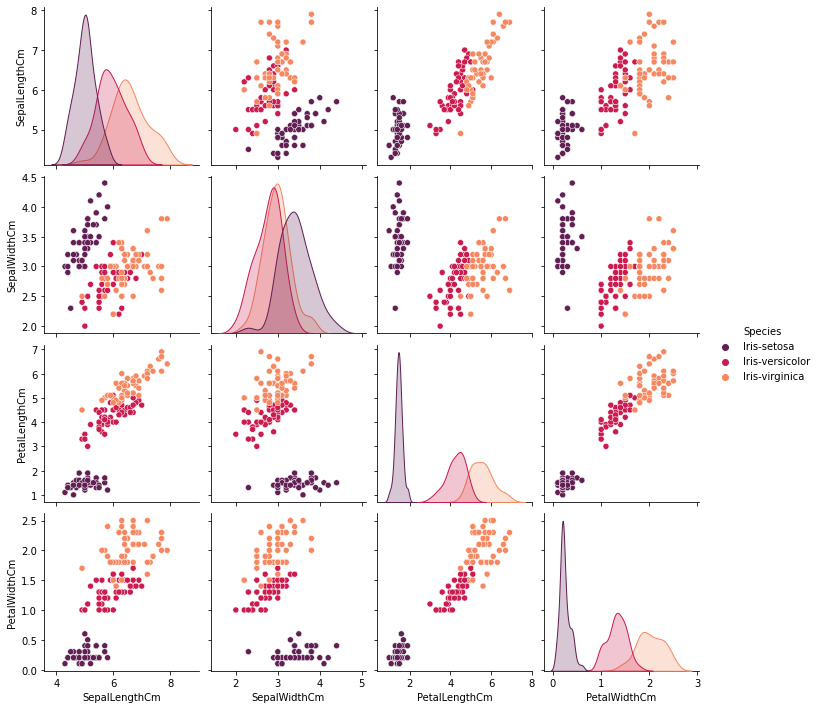

In [15]:
#use pairplot to show the relationship between all variables
pair = df1.iloc[:, 1:6]
sns.pairplot(pair, hue='Species', palette='rocket')
plt.savefig("pairplotiris.svg")

### Violin plot
We can use the violin plot to show the distribution of the different Species

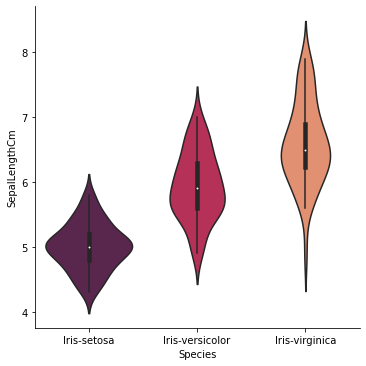

In [16]:
#Sepallength
sns.catplot(x='Species', y='SepalLengthCm', kind='violin', data=df1, palette='rocket')
plt.savefig("violinsepallengthiris.svg")

Iris virginica has the longest sepal length while iris setosa has the shortest.

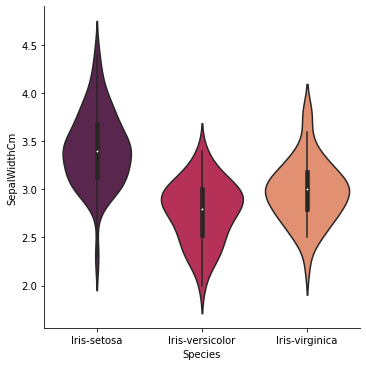

In [17]:
#Sepal Width
sns.catplot(x='Species', y='SepalWidthCm', kind='violin', data=df1, palette='rocket')
plt.savefig("violinsepalwidth.svg")

Iris setosa has the highest sepal width while iris versicolor has the lowest

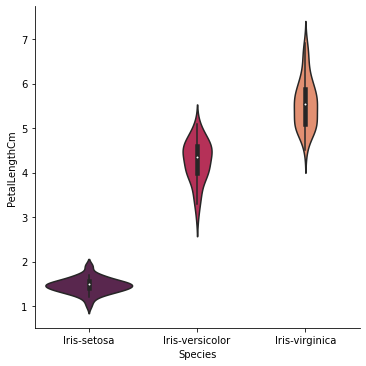

In [18]:
#Petal length
sns.catplot(x='Species', y='PetalLengthCm', kind='violin', data=df1, palette='rocket')
plt.savefig("violinpetallength.svg")

Iris virginica has the longest petal length while iris setosa has the shortest

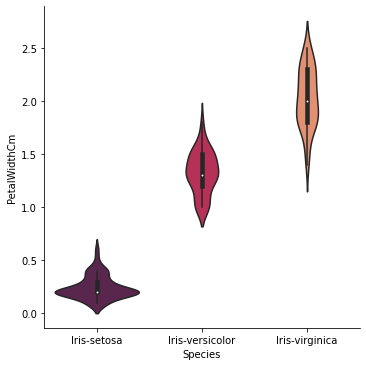

In [19]:
#Petal width
sns.catplot(x='Species', y='PetalWidthCm', kind='violin', data=df1, palette='rocket')
plt.savefig("violinpetalwidth.svg")

Iris virginica has the highest petal width while iris setosa has the lowest.

### Clustering

This can also be used to view the relationship between the species. The clustering is done by hierachial clustering and the closely related species cluster together.

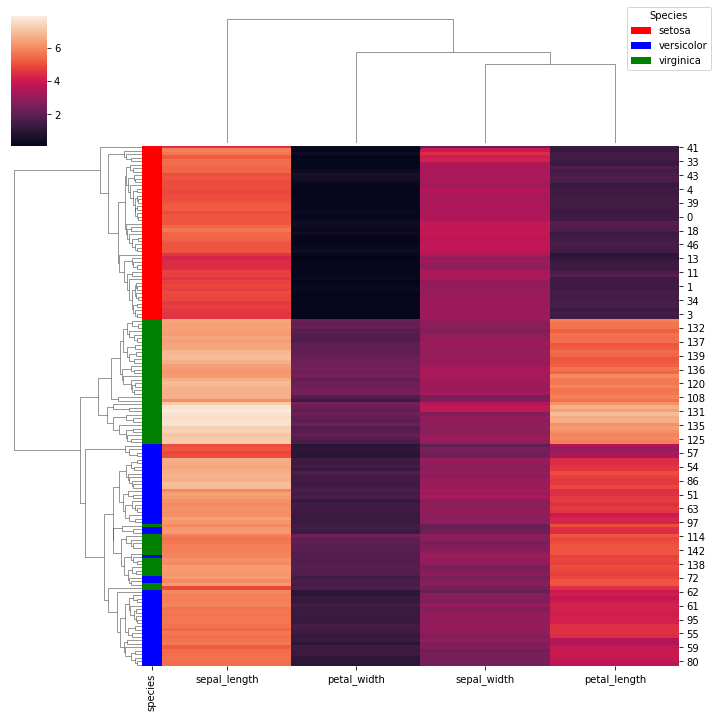

In [20]:
iris = sns.load_dataset("iris")
species = iris.pop("species")
clust = dict(zip(species.unique(), "rbg"))
row_colors = species.map(clust)
g = sns.clustermap(iris, row_colors=row_colors)
#import
from matplotlib.patches import Patch
handles = [Patch(facecolor=clust[name]) for name in clust]
plt.legend(handles, clust, title='Species',
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.savefig("clusteriris.svg")

Here we can a relationship with the Iris versicolor and Iris virginica flower